# Visualizing Data

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify

%matplotlib inline  

In [3]:
data = pd.read_csv('./data/cleaned/cleaned_data.csv')
data

,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,fulfilled-by
0,2022-04-30,Cancelled,Merchant,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,400081,False,Easy Ship
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085,False,Easy Ship
2,2022-04-30,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210,True,Other methods
3,2022-04-30,Cancelled,Merchant,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,605008,False,Easy Ship
4,2022-04-30,Shipped,Amazon,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073,False,Other methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126430,2022-05-31,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,517.00,HYDERABAD,TELANGANA,500013,False,Other methods
126431,2022-05-31,Shipped,Amazon,Expedited,T-shirt,M,Shipped,1,999.00,GURUGRAM,HARYANA,122004,False,Other methods
126432,2022-05-31,Shipped,Amazon,Expedited,Blazzer,XXL,Shipped,1,690.00,HYDERABAD,TELANGANA,500049,False,Other methods
126433,2022-05-31,Shipped,Amazon,Expedited,T-shirt,XS,Shipped,1,1199.00,Halol,Gujarat,389350,False,Other methods


## Columns Meaning (This data is amazon sale report in India)
- **Date**: The date when the order was placed.
- **Status**: The current status of the order.
- **Fulfilment**: Indicates the method used to fulfill the order.
- **ship-service-level**: The shipping service level selected for the order.
- **Category**: The product category to which the purchased item belongs.
- **Size**: The size of the product ordered.
- **Courier Status**: The shipping status.
- **Qty**: The quantity of the product in the order.
- **Amount**: The amount or cost of the order.
- **ship-city**: The city to which the product is shipped
- **ship-date**: The state to which the product is shipped
- **ship-postal-code**: The postal code of the destination.
- **B2B**: Specifies whether the transaction is a business-to-business transaction.
- **fulfilled-by**: The method for fulfilling the order.


### Distribution in order status

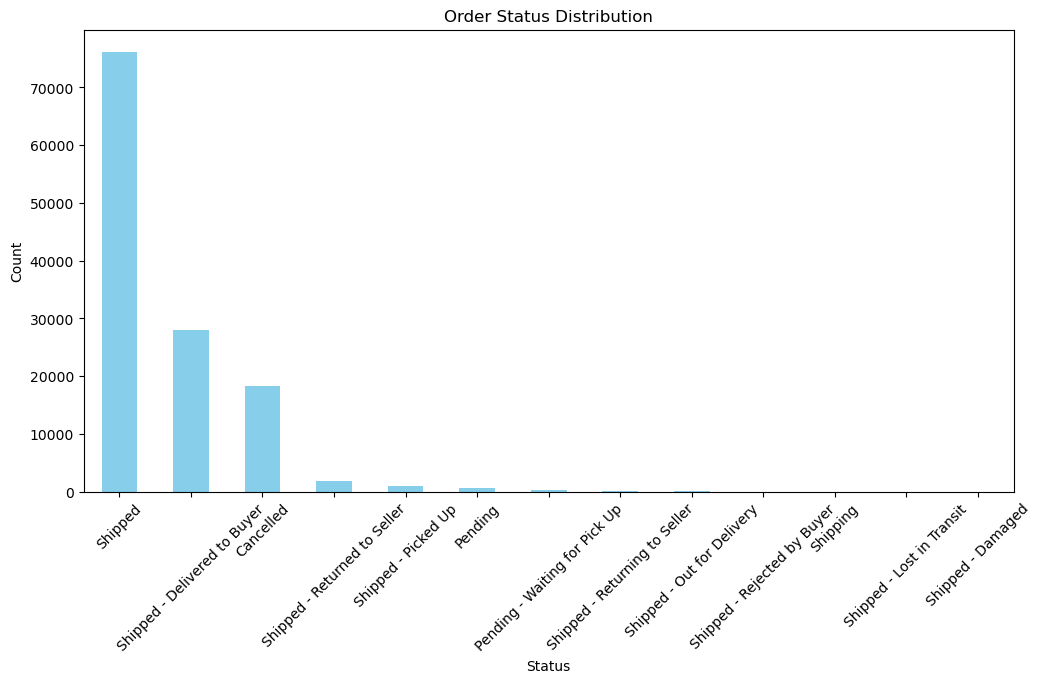

In [4]:
# Visualizing order status distribution
plt.figure(figsize=(12, 6))
data['Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Order Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

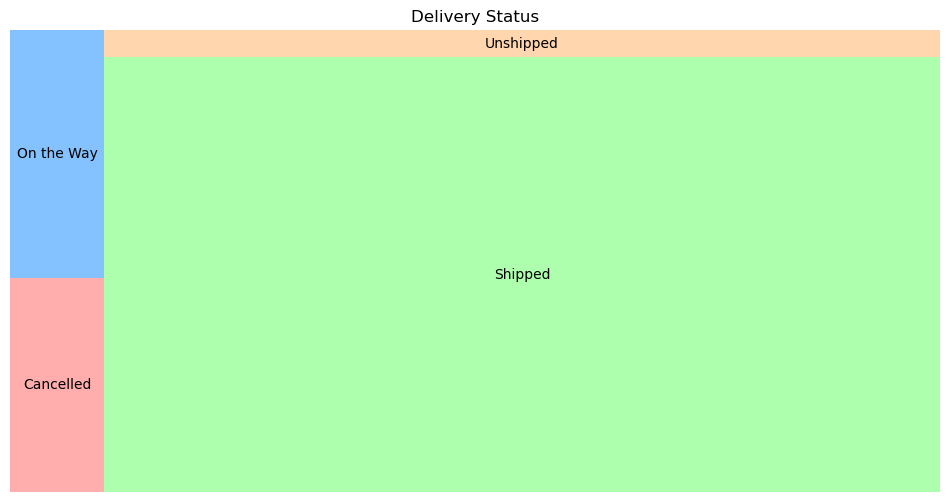

In [5]:
courier_counts = data.groupby('Courier Status').size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
squarify.plot(sizes=courier_counts['Count'], label=courier_counts['Courier Status'], color=colors, alpha=.8)
plt.title('Delivery Status')
plt.axis('off')
plt.show()

In [6]:
status_counts = data.groupby(['Date', 'Courier Status']).size().unstack(fill_value=0)
status_counts = status_counts.loc[:, ['Shipped', 'Cancelled']]
status_counts

Courier Status,Shipped,Cancelled
Date,,
2022-03-31,152,9
2022-04-01,1202,97
2022-04-02,1265,72
2022-04-03,1422,77
2022-04-04,1246,73
...,...,...
2022-06-25,869,50
2022-06-26,1015,35
2022-06-27,888,44


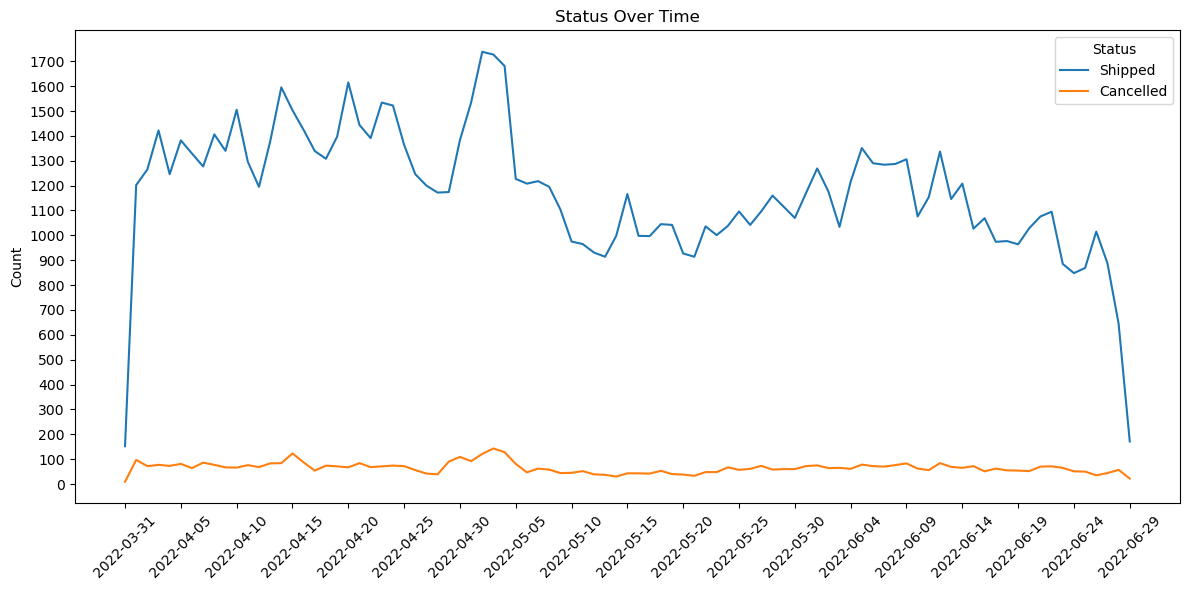

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(status_counts.index, status_counts['Shipped'], label='Shipped')
plt.plot(status_counts.index, status_counts['Cancelled'], label='Cancelled')

plt.title('Status Over Time')
plt.xlabel('')
plt.ylabel('Count')

n = 5 
plt.xticks(ticks=status_counts.index[::n], labels=status_counts.index[::n], rotation=45)

m = 100
plt.yticks(ticks=range(0, max(status_counts.max()) + 1, m))

plt.legend(title='Status')
plt.grid(False)
plt.tight_layout()
plt.show()

### Compare merchant fulfillment services and Amazon in terms of delivery and cancellation rates.

In [8]:
data['Fulfilment'].value_counts().to_frame()

,count
Fulfilment,
Amazon,88048
Merchant,38387


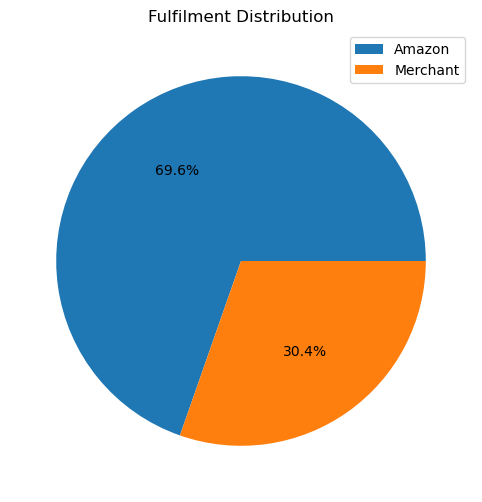

In [9]:
# pie chart of fulfilment distribution & remove name of the index
plt.figure(figsize=(12, 6))
data['Fulfilment'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.title('Fulfilment Distribution')
plt.legend(labels=data['Fulfilment'].value_counts().index, loc='upper right')
plt.ylabel('')
plt.show()

In [10]:
# Plot delivery and cancellation rates by fulfilment
fulfilment_counts = data.groupby(['Fulfilment', 'Courier Status']).size().unstack(fill_value=0)
fulfilment_counts = fulfilment_counts.loc[:, ['Shipped', 'Cancelled']]
fulfilment_counts

Courier Status,Shipped,Cancelled
Fulfilment,,
Amazon,75981,5927
Merchant,31020,0


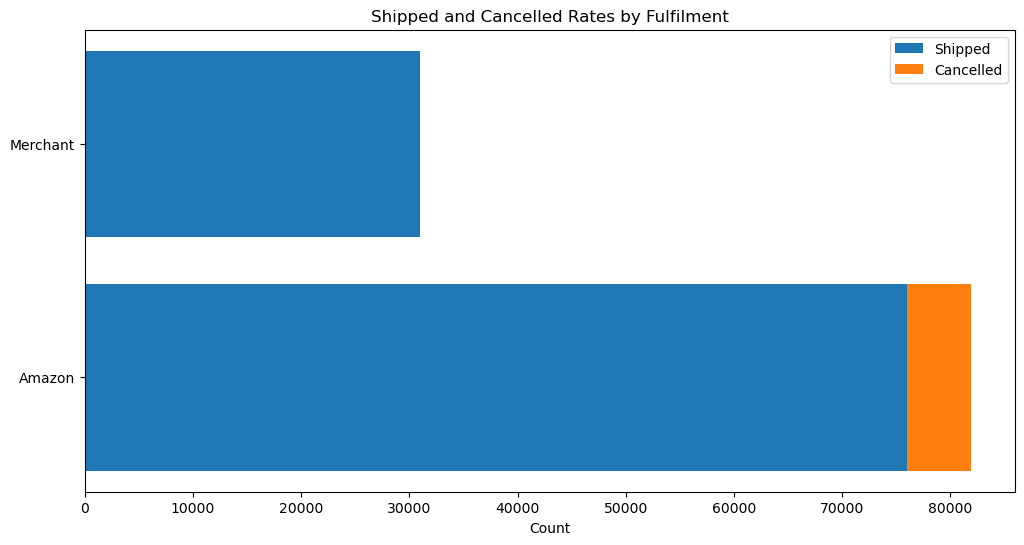

In [11]:
categories = fulfilment_counts.index 
values1 = fulfilment_counts['Shipped']
values2 = fulfilment_counts['Cancelled']

y_pos = np.arange(len(categories))

plt.figure(figsize=(12, 6))

plt.barh(y_pos, values1, label='Shipped')
plt.barh(y_pos, values2, left=values1, label='Cancelled')

plt.xlabel('Count')
plt.title('Shipped and Cancelled Rates by Fulfilment')
plt.yticks(y_pos, categories)
plt.legend()
plt.show()

### Distibution of Amount

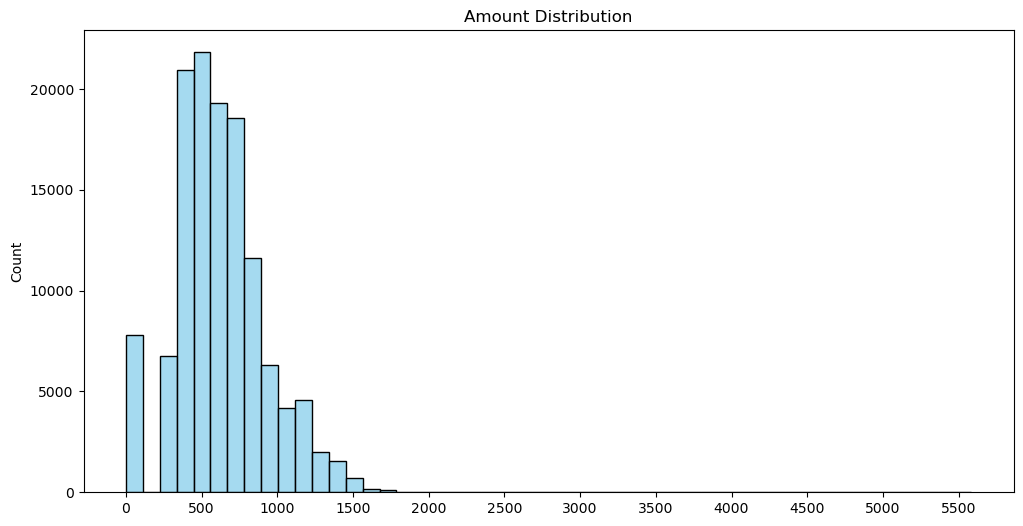

In [12]:
# Distribution of amount
plt.figure(figsize=(12, 6))
sns.histplot(data['Amount'], bins=50, color='skyblue')
plt.title('Amount Distribution')
plt.xlabel('')
plt.ylabel('Count')

x_ticks = np.arange(data['Amount'].min(), data['Amount'].max(), step=500) 
plt.xticks(ticks=x_ticks)

plt.show()

### Size of state

In [13]:
data['Size'].value_counts().to_frame()

,count
Size,
M,21928
L,21305
XL,20119
XXL,17426
S,16422
3XL,14424
XS,10922
Free,2195
6XL,731


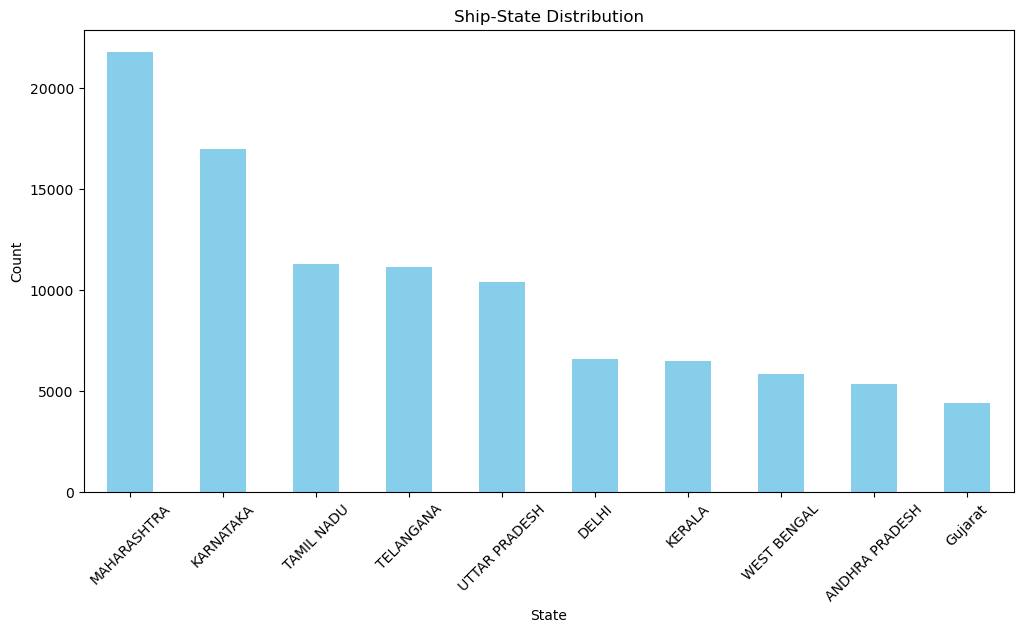

In [14]:
# plot bar of ship-state distribution
plt.figure(figsize=(12, 6))
data['ship-state'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('Ship-State Distribution')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Question: plot the size of which state is the most popular
state_size = data.copy()
state_size['Small_Size_Count'] = state_size['Size'].apply(lambda x: 1 if x in ['XS', 'S', 'M'] else 0)
state_size['Normal_Size_Count'] = state_size['Size'].apply(lambda x: 1 if x in ['L', 'XL'] else 0)
state_size['Big_Size_Count'] = state_size['Size'].apply(lambda x: 1 if x in ['XXL', 'XXXL', '3XL', '4XL', '5XL', '6XL'] else 0)

state_size = state_size.groupby('ship-state').agg({'Small_Size_Count': 'sum', 'Normal_Size_Count': 'sum', 'Big_Size_Count': 'sum'})
state_size['Total'] = state_size.sum(axis=1)
state_size = state_size.sort_values(by='Total', ascending=False)

state_size

,Small_Size_Count,Normal_Size_Count,Big_Size_Count,Total
ship-state,,,,
MAHARASHTRA,7797,7268,6371,21436
KARNATAKA,6587,5703,4287,16577
TAMIL NADU,4261,3744,3083,11088
TELANGANA,4133,3692,3099,10924
UTTAR PRADESH,4201,3288,2722,10211
...,...,...,...,...
PB,0,0,1,1
Nagaland,1,0,0,1
AR,0,1,0,1


/tmp/ipykernel_3823/4166166948.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


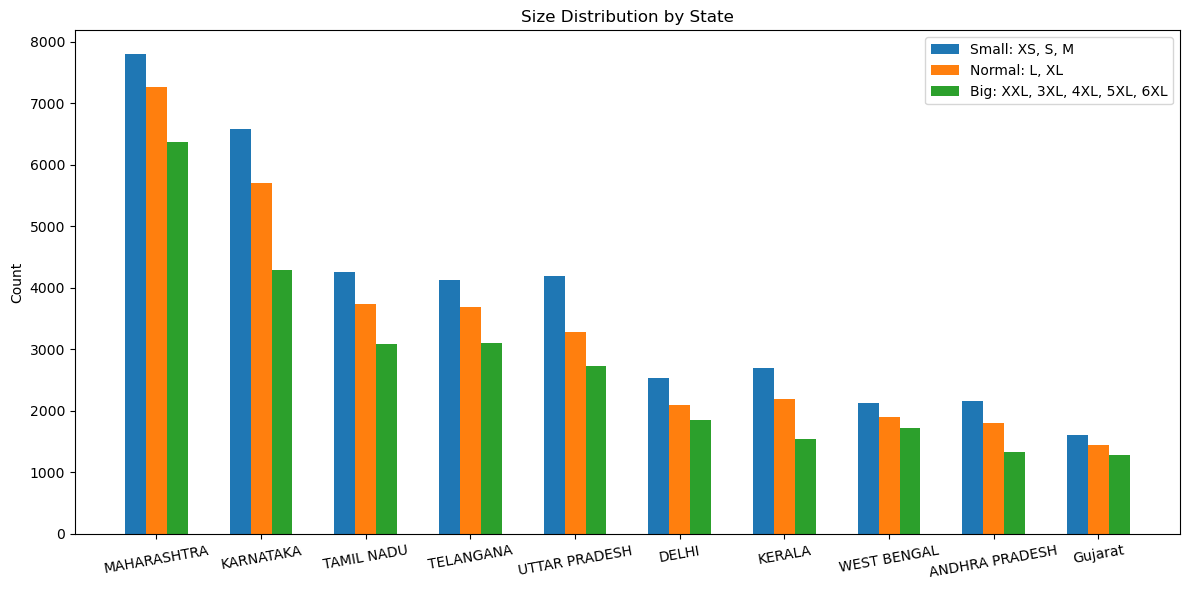

In [16]:
top_10_state_size = state_size[:10]

x = np.arange(len(top_10_state_size))
bar_width = 0.2
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 6))

for size in ['Small_Size_Count', 'Normal_Size_Count', 'Big_Size_Count']:
    ax.bar(x + multiplier, top_10_state_size[size], width=bar_width, label=size)
    multiplier += bar_width

ax.set_xticks(x + bar_width)
ax.set_xticklabels(top_10_state_size.index)

plt.title('Size Distribution by State')
plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='Size')
plt.xticks(rotation=10)
plt.tight_layout()

plt.legend(['Small: XS, S, M', 'Normal: L, XL', 'Big: XXL, 3XL, 4XL, 5XL, 6XL'], loc='upper right')

plt.show()


### Heatmap

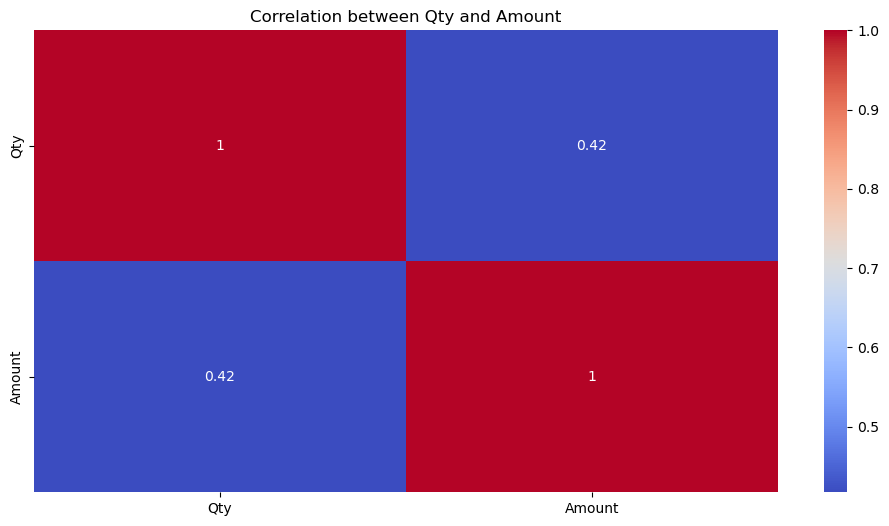

In [21]:
# Correlation between size, Qty, Amount
size_qty_amount = data[['Qty', 'Amount']]
size_qty_amount

plt.figure(figsize=(12, 6))
sns.heatmap(size_qty_amount.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Qty and Amount')
plt.show()

### Boxplot

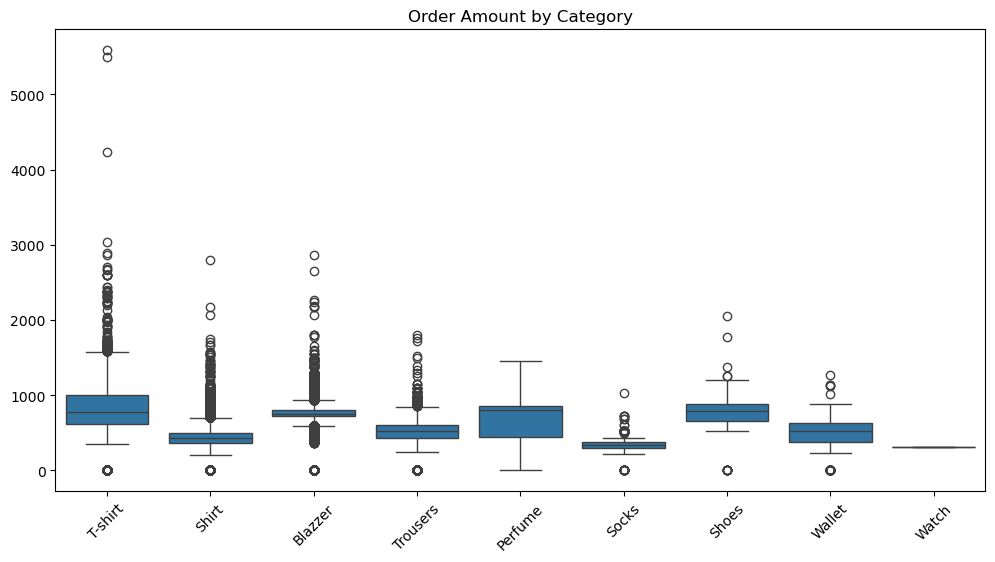

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='Category', y='Amount')
plt.title('Order Amount by Category')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show()
